# Analysis of Red Wine Quality

# Index
## 1. Reading the data and importing the libraries
## 2. EDA
## 3. Correlation Matrix 
## 4. Modeling 
    -  Linear Model
    -  Weighted KNN
    -  Random Forest
    -  Conditional Inference Random Forest
    -  Decision Tree Model
## 5. Modeling Results Table
## 6. Conclusion

## 1. Reading the data and importing the libraries

In [ ]:
library(tidyverse)
library(grid)
library(gridExtra)
library(e1071)
library(caret)

In [2]:
df1 <- read.csv("C:/Users/kausha2/Documents/Data Analytics/DataSets/winequality/winequality/winequality-red.csv", sep = ";")

In [3]:
head(df1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5.0000
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5.0000
3,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5.000
4,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6.000
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5.0000
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5.0000


In [4]:
summary(df1$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

### Creating a new variable -->  WineAttribute : Good (1) or bad (0) for binary classification

In [5]:
df1$wine_attribute <- ifelse(df1$quality > 5, 1, 0 )

In [6]:
head(df1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine_attribute
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5.0000,0.0000
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5.0000,0.0000
3,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5.000,0.000
4,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6.000,1.000
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5.0000,0.0000
6,7.4000,0.6600,0.0000,1.8000,0.0750,13.0000,40.0000,0.9978,3.5100,0.5600,9.4000,5.0000,0.0000


## 2. EDA

#### How is the wine quality distributed?

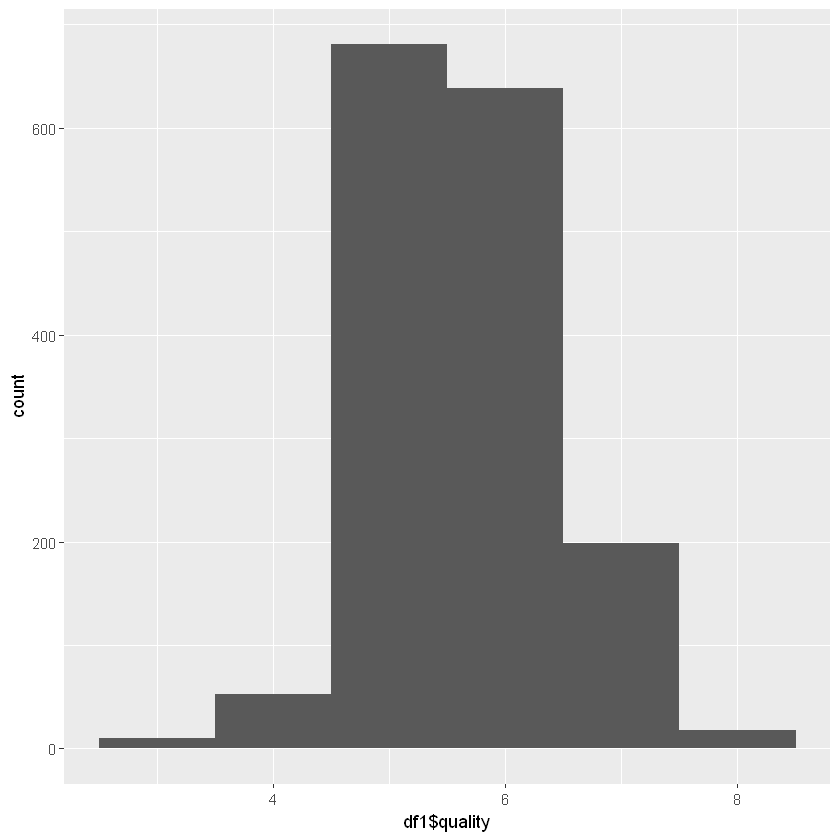

In [7]:
qplot(df1$quality, geom="histogram", binwidth = 1)

- The dataset is dominated by values 5 and 6. There are less wines with a quality of 4 and 7 whereas there are hardly any wines that have values less 3 and 8
- there are two options : either split the quality variable into 3 parts by quantiles : top 20, middle 60 and bottom 20 or split based on the mean i.e. Good wines are those which have values >5 and bad wines are those with values less or equal to 5

#### Looking at the different histograms to check the shape of the distributions

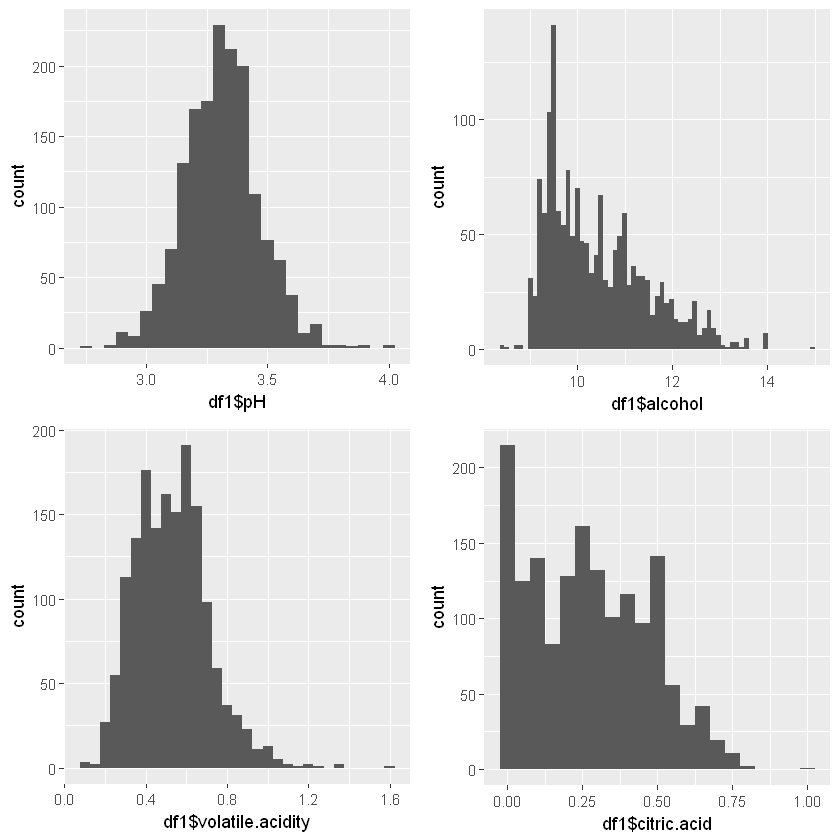

In [8]:
p1 <- qplot(df1$pH, geom="histogram", binwidth = 0.05) 
p2 <- qplot(df1$alcohol, geom="histogram",binwidth = 0.099) 
p3 <- qplot(df1$volatile.acidity, geom="histogram",binwidth = 0.05) 
p4 <- qplot(df1$citric.acid, geom="histogram",binwidth = 0.05)
grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2)

- We see that pH looks normally distributed 
- Volatile acidity, Alcohol and citric acid have a positive skew shape but dont seem to follow a particular distribution

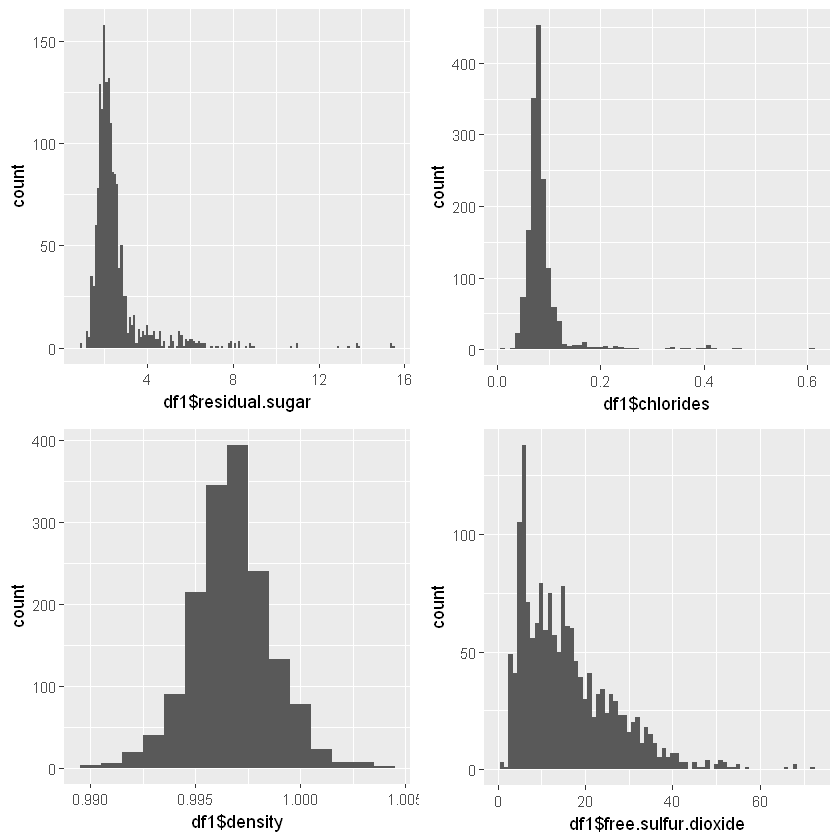

In [9]:
p1 <- qplot(df1$residual.sugar, geom="histogram", binwidth = 0.1) 
p2 <- qplot(df1$chlorides, geom="histogram",binwidth = 0.01) 
p3 <- qplot(df1$density, geom="histogram",binwidth = 0.001) 
p4 <- qplot(df1$free.sulfur.dioxide, geom="histogram",binwidth = 1)
grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2)

- Density seems to follow a normal distribution. 
- Residual sugar and chlorides seem to follow a normal distribution initially but flatten out later
- Free sulfur dioxide content seems to have a positive skew shaped distribution

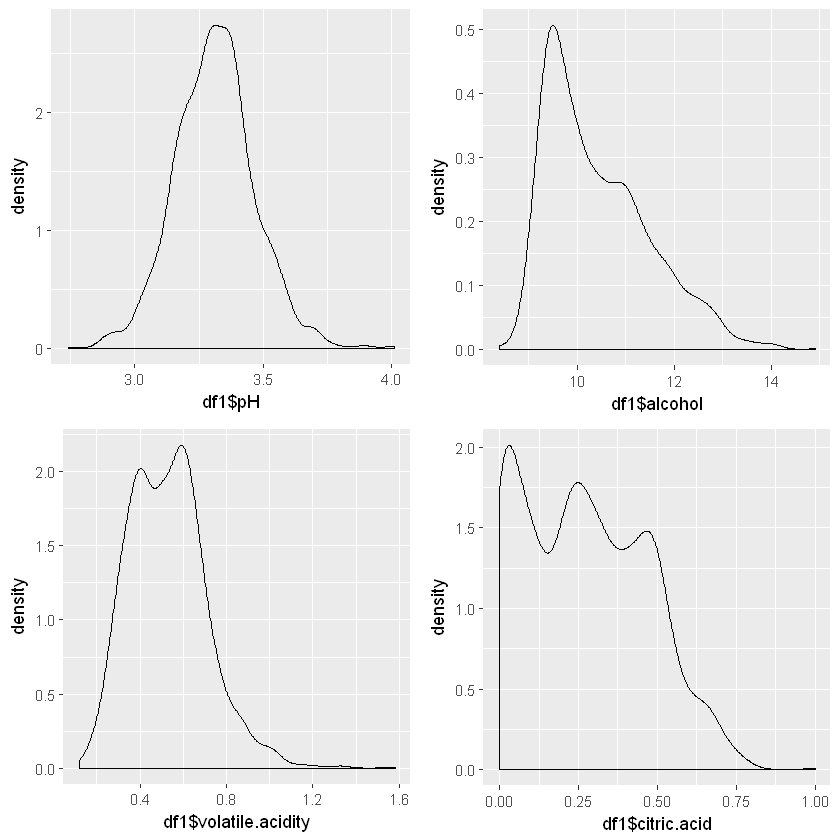

In [10]:
p1 <- qplot(df1$pH, geom="density") 
p2 <- qplot(df1$alcohol, geom="density") 
p3 <- qplot(df1$volatile.acidity, geom="density") 
p4 <- qplot(df1$citric.acid, geom="density")
grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2)

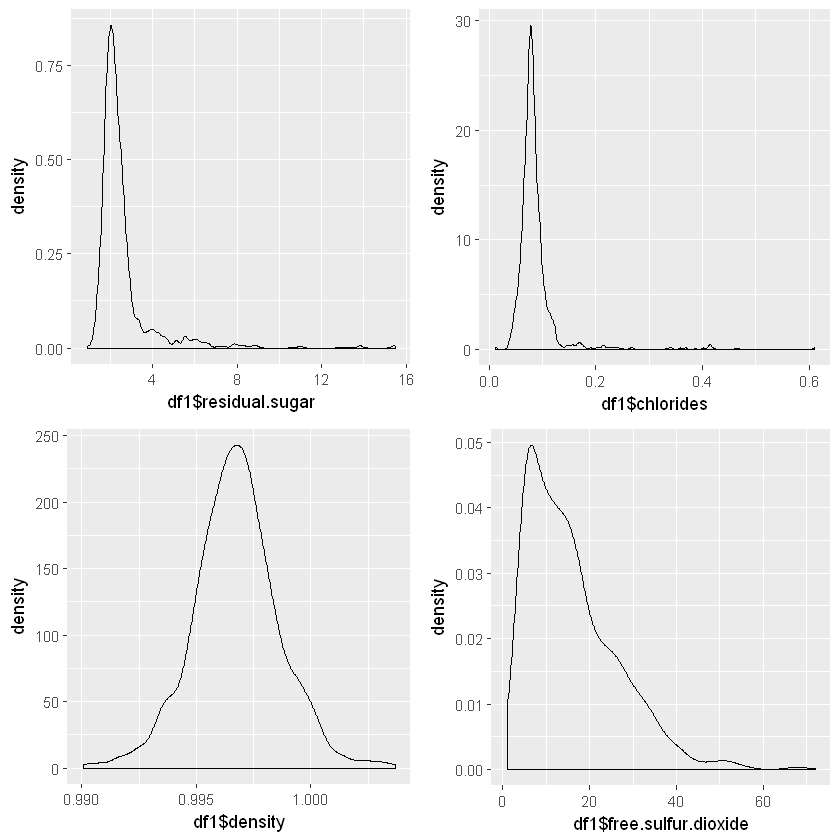

In [11]:
p1 <- qplot(df1$residual.sugar, geom="density") 
p2 <- qplot(df1$chlorides, geom="density") 
p3 <- qplot(df1$density, geom="density") 
p4 <- qplot(df1$free.sulfur.dioxide, geom="density")
grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2)

- The kernel density plots seem to agree with the histograms and our conclusions

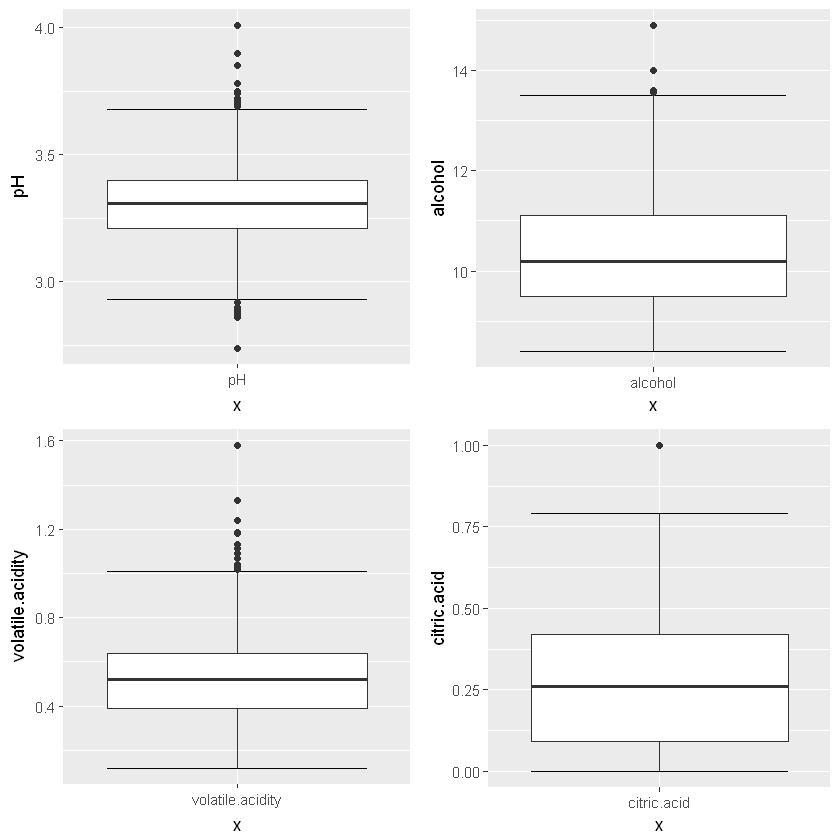

In [12]:
p1 <- ggplot(df1, aes(x="pH", y=pH)) + stat_boxplot(geom ='errorbar') + geom_boxplot()
p2 <- ggplot(df1, aes(x="alcohol", y=alcohol)) + stat_boxplot(geom ='errorbar') + geom_boxplot()
p3 <- ggplot(df1, aes(x="volatile.acidity", y=volatile.acidity)) + stat_boxplot(geom ='errorbar') + geom_boxplot()
p4 <- ggplot(df1, aes(x="citric.acid", y=citric.acid)) + stat_boxplot(geom ='errorbar') + geom_boxplot()
grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2)

- pH and acidity seem to have a lot of outliers.
- The pH of an acidic substance is usally below 5 but for wines it seems to concentrate in the area between 2.7 and 4.0.
- The alcohol content is between 8.4 to 15 but there seem to be many outliers. The Age of the wine also affects its alcohol content. This could explain the outliers but since we don't have an age variable there is no way to check it.

## 3. Correlation Matrix
### Checking the Correlation between variables
 (sourced from : http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization)

Warning message:
"package 'reshape2' was built under R version 3.3.2"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



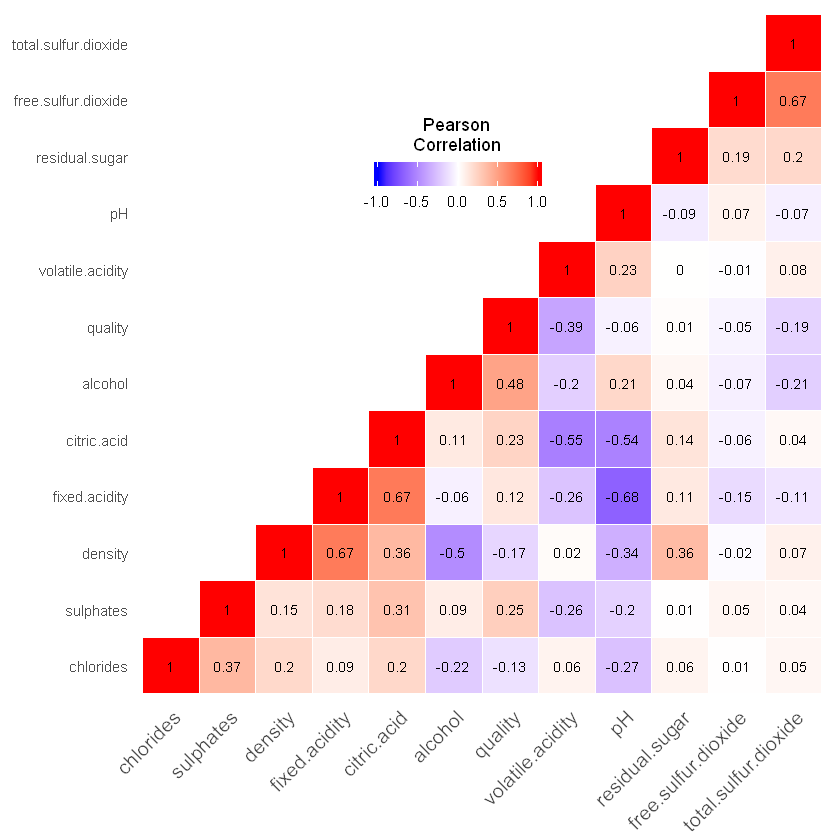

In [13]:
#data(attitude)
df2 <- df1
df2$wine_attribute <- NULL

library(ggplot2)
library(reshape2)


#(cor(df1) ) # correlation matrix
cormat <- cor(df2)
melted_cormat <- melt(cor(df2))

#ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
 # geom_tile()

# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }

upper_tri <- get_upper_tri(cormat)
#upper_tri

# Melt the correlation matrix
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap


reorder_cormat <- function(cormat){
# Use correlation between variables as distance
dd <- as.dist((1-cormat)/2)
hc <- hclust(dd)
cormat <-cormat[hc$order, hc$order]
}


# Reorder the correlation matrix
cormat <- reorder_cormat(cormat)
upper_tri <- get_upper_tri(cormat)
# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
    name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
# Print the heatmap
#print(ggheatmap)

ggheatmap + 
geom_text(aes(Var2, Var1, label = round(value,2) ), color = "black", size = 3) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

- The values in Red are positively correlated while those in Blue are negatively correlated. The density of the color determines the strength of correlation.
- Quality has a negative correlation with volatile acidity, and total sulfur dioxide content. While it has a positive correlation with alcohol content and citric acid.
- It can be seen that pH and fixed acidity have a strong negative correlation, 
- Residual sugar and sulphates have a very slight positive correlation
- Free sulfur dioxide and total sulfur dioxide are strongly positively correlated ( as expected ). But the fixed acidity and volatile acidity are negatively correlated. Interesting fact that could be used for modeling..

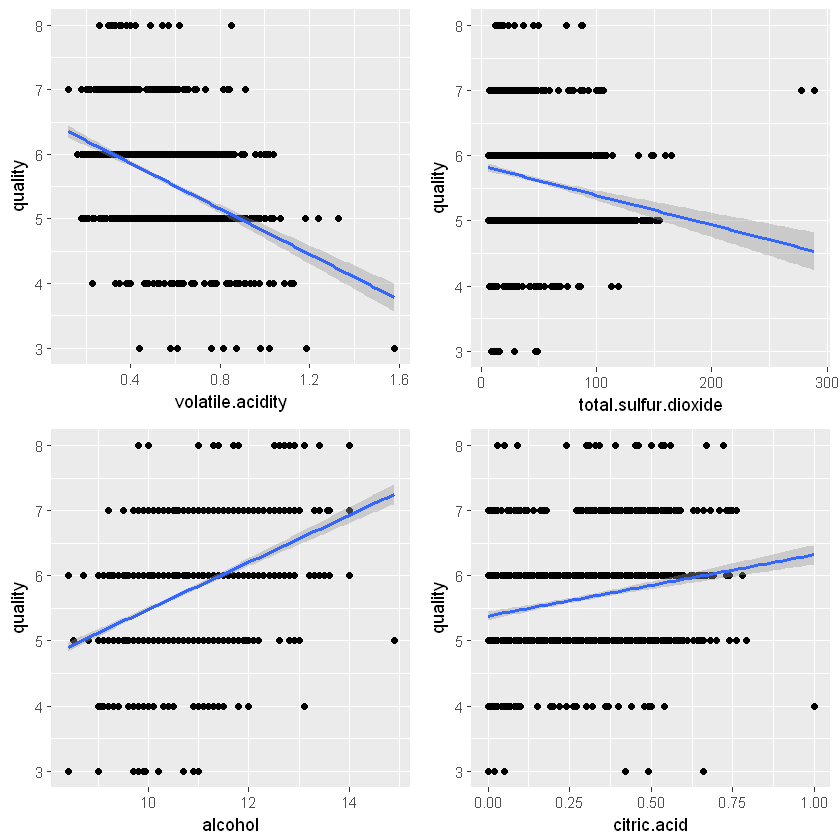

In [14]:
p1 <- ggplot(df1, aes(x= volatile.acidity, y= quality)) + geom_point() + geom_smooth(method=lm)
p2 <- ggplot(df1, aes(x= total.sulfur.dioxide, y= quality)) + geom_point() + geom_smooth(method=lm)
p3 <- ggplot(df1, aes(x= alcohol, y= quality)) + geom_point() + geom_smooth(method=lm)
p4 <- ggplot(df1, aes(x= citric.acid, y= quality)) + geom_point() + geom_smooth(method=lm)
#p5 <- ggplot(df1, aes(x= sulphates, y= quality)) + geom_point() + geom_smooth(method=lm)

grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2)

### This confirms our analysis from the correlation matrix

## 4. Modeling

### We'll be using a 10-fold cross validation

We perform the 10 fold CV on the learning dataset and try to predict the valid dataset

In [15]:
# Train Test Split
m <- dim(df1)[1] # Select the rows of iris

val <- sample(1:m, size = round(m/3), replace = FALSE, prob = rep(1/m, m)) 

df1.learn <- df1[-val,] 	# train
df1.valid <- df1[val,]	# test


# 10 Fold CV

library(caret)

# define training control
train_control <- trainControl(method="cv", number=10)

#trControl <- train_control

### The linear model  : trying to predict wine quality from the variables

In [16]:
head(df1,1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine_attribute
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5.0000,0.0000


In [17]:
model1 <- lm(as.numeric(quality)~ 0  + volatile.acidity + chlorides
             + log(free.sulfur.dioxide) + log(total.sulfur.dioxide) + density + pH + sulphates + alcohol, data = df1)
summary(model1)


Call:
lm(formula = as.numeric(quality) ~ 0 + volatile.acidity + chlorides + 
    log(free.sulfur.dioxide) + log(total.sulfur.dioxide) + density + 
    pH + sulphates + alcohol, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.69097 -0.36206 -0.05359  0.46353  2.04733 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
volatile.acidity          -1.02941    0.10066 -10.227  < 2e-16 ***
chlorides                 -1.95204    0.39800  -4.905 1.03e-06 ***
log(free.sulfur.dioxide)   0.12547    0.03931   3.192 0.001440 ** 
log(total.sulfur.dioxide) -0.17964    0.03895  -4.612 4.30e-06 ***
density                    4.56599    0.41131  11.101  < 2e-16 ***
pH                        -0.44665    0.11657  -3.832 0.000132 ***
sulphates                  0.88106    0.11055   7.970 3.01e-15 ***
alcohol                    0.29026    0.01697  17.101  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard er

In [18]:
df1.valid$prediction <- predict(model1,df1.valid)

In [19]:
df1.valid$prediction_lm <- round(df1.valid$prediction)

In [20]:
x <- confusionMatrix(df1.valid$prediction_lm, df1.valid$quality)
acc_lm <- x$overall[1]

print(c("accuracy of linear model is :", (acc_lm*100) ))

Warning message in levels(reference) != levels(data):
"longer object length is not a multiple of shorter object length"Warning message in confusionMatrix.default(df1.valid$prediction_lm, df1.valid$quality):
"Levels are not in the same order for reference and data. Refactoring data to match."

                                                       Accuracy 
"accuracy of linear model is :"              "60.9756097560976" 


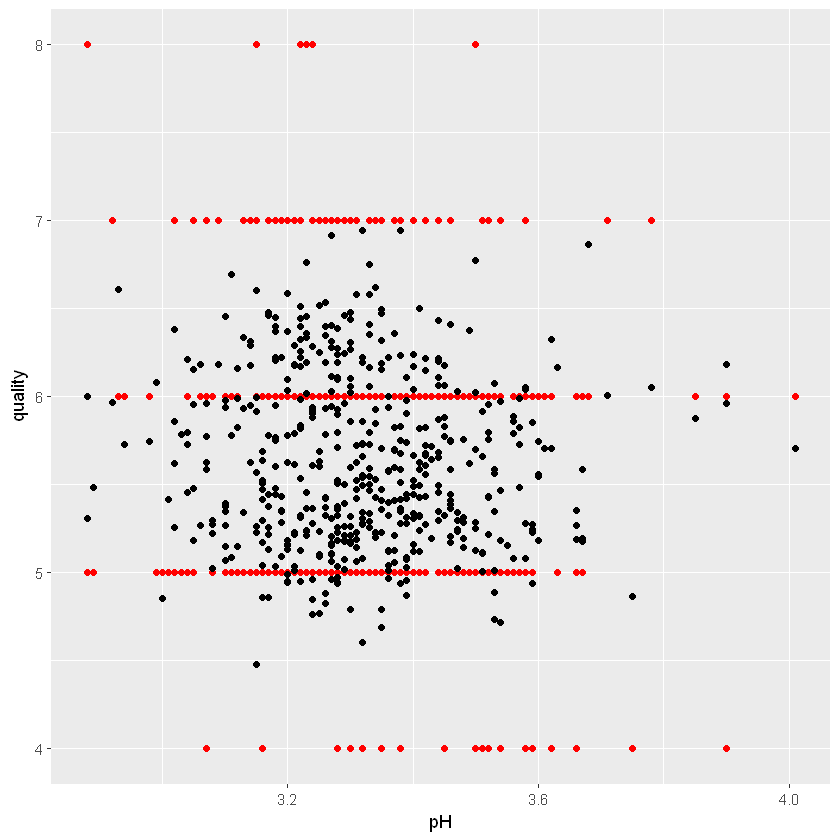

In [21]:
ggplot(df1.valid) + geom_point(aes(pH, quality), color = "red") + geom_point(aes(pH, prediction)) 

 From the above graph we see that this is not what we intended. Therefore we move on to classification models

## Weighted KNN

Using multiple K, distance metrics and kernels

In [ ]:
require(kknn)


In [23]:
model2 <- kknn( factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn, df1.valid) 
x <- confusionMatrix(df1.valid$wine_attribute, model2$fit)
y <- (x$table)
y
acc_kknn1 <- (y[1,1]+y[2,2]) / (y[1,1]+y[1,2]+y[2,2]+y[2,1])
print(c("accuracy of KKNN is :", round(acc_kknn1*100,3) ))

          Reference
Prediction   0   1
         0 173  68
         1  74 218

[1] "accuracy of KKNN is :" "73.358"               


In [24]:
model3 <- train.kknn(factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn,trControl = train_control, kmax = 15, kernel = c("triangular", "epanechnikov", "biweight", "triweight", "cos", "inv", "gaussian", "rank", "optimal"), distance = 1)
summary(model3)

x <- confusionMatrix(predict(model3, df1.valid), df1.valid$wine_attribute)
y <- (x$table)
y
acc_kknn2 <- (y[1,1]+y[2,2]) / (y[1,1]+y[1,2]+y[2,2]+y[2,1])
print(c("accuracy of KKNN is :", round(acc_kknn2*100,3) ))


Call:
train.kknn(formula = factor(wine_attribute) ~ fixed.acidity +     volatile.acidity + citric.acid + residual.sugar + chlorides +     free.sulfur.dioxide + total.sulfur.dioxide + density + pH +     sulphates + alcohol, data = df1.learn, kmax = 15, distance = 1,     kernel = c("triangular", "epanechnikov", "biweight", "triweight",         "cos", "inv", "gaussian", "rank", "optimal"), trControl = train_control)

Type of response variable: nominal
Minimal misclassification: 0.2045028
Best kernel: inv
Best k: 11


          Reference
Prediction   0   1
         0 186  63
         1  55 229

[1] "accuracy of KKNN is :" "77.861"               


In [25]:
model4 <- train.kknn(factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn,trControl = train_control, kmax = 15, kernel = c("triangular", "epanechnikov", "biweight", "triweight", "cos", "inv", "gaussian", "rank", "optimal"), distance = 5)
summary(model4)

x <- confusionMatrix(predict(model4, df1.valid), df1.valid$wine_attribute)
y <- (x$table)
y
acc_kknn3 <- (y[1,1]+y[2,2]) / (y[1,1]+y[1,2]+y[2,2]+y[2,1])
print(c("accuracy of KKNN is :", round(acc_kknn3*100,3) ))


Call:
train.kknn(formula = factor(wine_attribute) ~ fixed.acidity +     volatile.acidity + citric.acid + residual.sugar + chlorides +     free.sulfur.dioxide + total.sulfur.dioxide + density + pH +     sulphates + alcohol, data = df1.learn, kmax = 15, distance = 5,     kernel = c("triangular", "epanechnikov", "biweight", "triweight",         "cos", "inv", "gaussian", "rank", "optimal"), trControl = train_control)

Type of response variable: nominal
Minimal misclassification: 0.206379
Best kernel: inv
Best k: 13


          Reference
Prediction   0   1
         0 183  62
         1  58 230

[1] "accuracy of KKNN is :" "77.486"               


Weighted KKNN gave us decent results. Lets see if we can improve on it.

# Tree Models
## Random Forest

In [ ]:
library(randomForest)

In [27]:
model5 <- randomForest(as.factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn,trControl = train_control,  importance=TRUE, ntree=2000)

In [28]:
df1.valid$prediction <- predict(model5, df1.valid)

In [29]:
x <- confusionMatrix(df1.valid$prediction, df1.valid$wine_attribute)

y <- (x$table)

y

acc_rf <- (y[1,1]+y[2,2]) / (y[1,1]+y[1,2]+y[2,2]+y[2,1])

print(c("accuracy of Random Forest is :", round(acc_rf*100,3) ))

          Reference
Prediction   0   1
         0 207  63
         1  34 229

[1] "accuracy of Random Forest is :" "81.801"                        


In [30]:
importance(model5)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
fixed.acidity,31.90106,33.86908,50.21507,35.93648
volatile.acidity,63.84695,56.40573,80.46705,65.09615
citric.acid,28.61191,37.23768,48.25039,35.60501
residual.sugar,31.18096,26.05024,40.36157,29.77151
chlorides,37.72957,32.11711,49.22559,40.07284
free.sulfur.dioxide,29.44250,28.93713,43.06980,30.88425
total.sulfur.dioxide,49.63323,58.42615,75.73582,51.31756
density,33.03413,46.89306,59.01841,47.66339
pH,28.48902,35.41322,47.76168,35.05043
sulphates,73.95690,80.78702,101.08121,70.75412


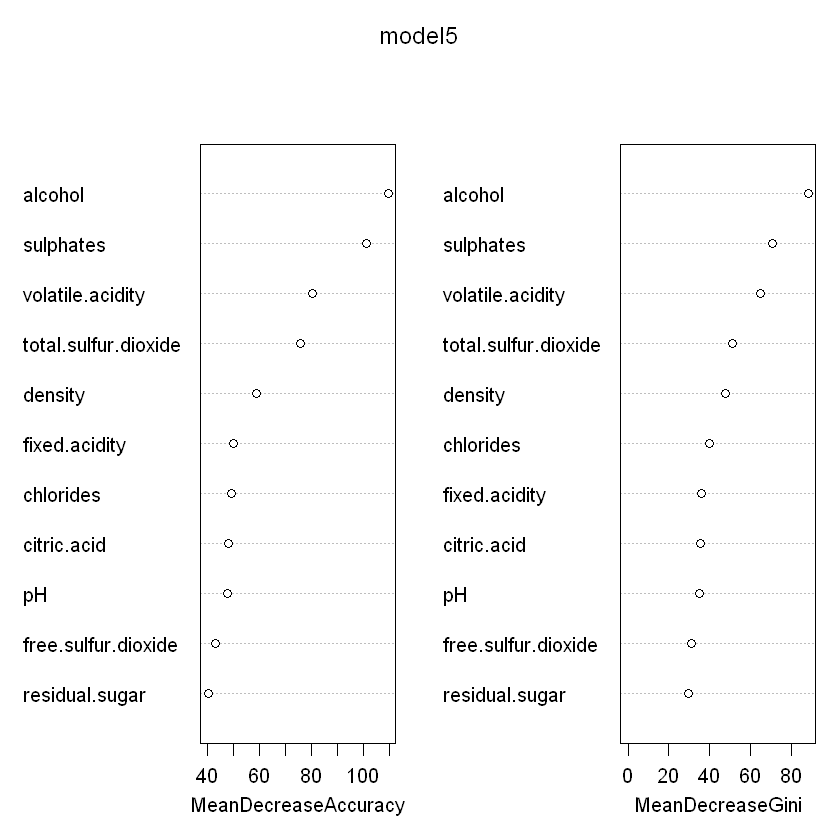

In [31]:
varImpPlot(model5) # importance of each variable

## Ensembling Random Forest with the Conditional Inference Tree

In [ ]:
library(party)

In [33]:
model5x <- cforest(as.factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn, controls=cforest_unbiased(ntree=2000, mtry=3))



In [34]:
df1.valid$pred_cforest <- predict(model5x, df1.valid, OOB=TRUE, type = "response")

In [35]:
x <- confusionMatrix(df1.valid$pred_cforest, df1.valid$wine_attribute)

y <- (x$table)

y

acc_cf <- (y[1,1]+y[2,2]) / (y[1,1]+y[1,2]+y[2,2]+y[2,1])

print(c("accuracy of Conditional Forest is :", round(acc_cf*100,3) ))

          Reference
Prediction   0   1
         0 194  68
         1  47 224

[1] "accuracy of Conditional Forest is :" "78.424"                             


## Decision Trees using Rpart

In [ ]:
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(rpart)

In [37]:
rpart.grid <- expand.grid(.cp=0.2)

model6 <- train(as.factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn,   method="rpart",trControl = train_control,tuneGrid=rpart.grid)

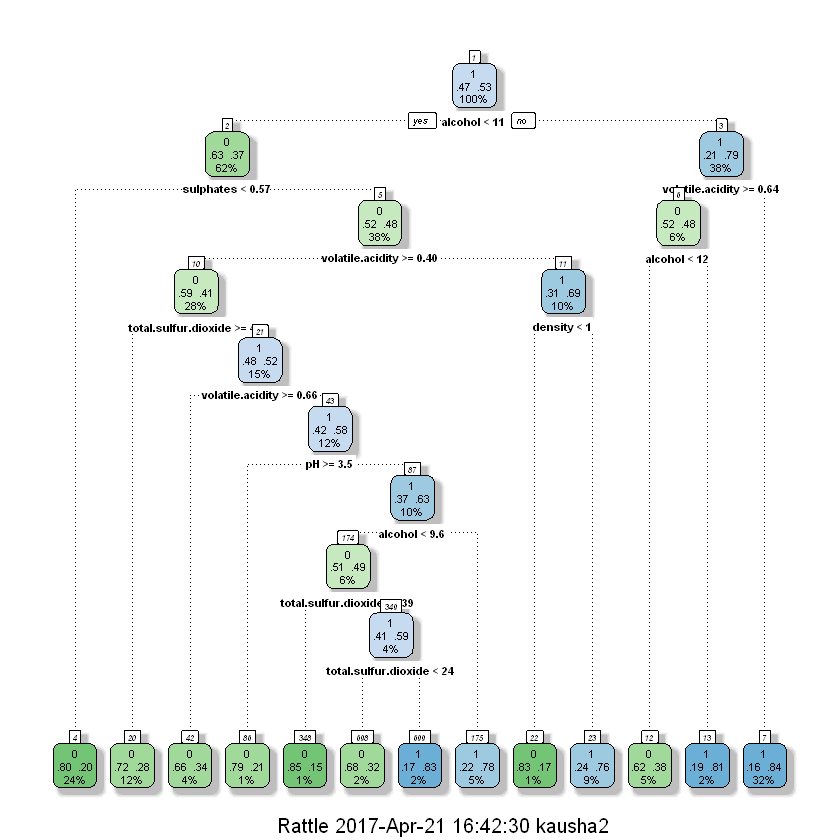

In [38]:
# How one of these trees look like

model6s <- rpart(as.factor(wine_attribute) ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar
                 + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH
                 + sulphates + alcohol, df1.learn,  method = "class")

fancyRpartPlot(model6s)

In [39]:
df1.valid$pred_dtree <- predict(model6, df1.valid)

In [40]:
x <- confusionMatrix(df1.valid$pred_dtree, df1.valid$wine_attribute)

y <- (x$table)

y

acc_dt <- (y[1,1]+y[2,2]) / (y[1,1]+y[1,2]+y[2,2]+y[2,1])

print(c("accuracy of Decision Tree classifier is :", round(acc_dt*100,3) ))

          Reference
Prediction   0   1
         0 199 122
         1  42 170

[1] "accuracy of Decision Tree classifier is :"
[2] "69.231"                                   


## 5. Modeling Results Table

In [41]:
Model_Name <- c("Linear Model", "Simple_KKNN","KKNN_dist1","KKNN_dist2", "RandomForest", "Conditional Forest", "Decision Tree")
Overall_Accuracy <- c(acc_lm*100, acc_kknn1*100, acc_kknn2*100, acc_kknn3*100, acc_rf*100, acc_cf*100, acc_dt*100)

final <- data.frame(Model_Name,Overall_Accuracy)

final$Overall_Accuracy <-  round( final$Overall_Accuracy, 3)

In [42]:
final

,Model_Name,Overall_Accuracy
1,Linear Model,60.976
2,Simple_KKNN,73.358
3,KKNN_dist1,77.861
4,KKNN_dist2,77.486
5,RandomForest,81.801
6,Conditional Forest,78.424
7,Decision Tree,69.231


## 6. Conclusion 

### The linear model gives a very high R Squared value(0.987) but it is nowhere close to the values we need as seen from the graph. The accuracy of the linear model is very low.
### Random Forest gives an overall best accuracy. 
### The models will give better results had the wine been split into 3 categories instead of two. This is largely because wines of quality 5 and 6 dominate the dataset.

### The reason for using the different algorithms :
- Linear Regression : Most widely used model in many real world applications. Though quality is a discrete variable, I wanted to see how the Linear Model stacks up against classifiers.
- KKNN : The weighted KNN has an advantage over the standard KNN as it takes into account kernel densities.
- Tree Models: The Random Forest is a great classifier overall and its robust enough to be used in the stock condition. Decision tree forms the most basic tree based classifier and its also easy to visualize.
- The Conditional Inference forest ensembles a randomForest but uses the Conditional Inference Tree as its estimator. However, it is not easy to run a 10-fold cross validation on this model.
